In [1]:
import numpy as np 
import pandas as pd
import scipy as scipy
import datetime as dt
from sklearn.model_selection import train_test_split
# import lightgbm as lgbm
import os
import gc

import matplotlib.pyplot as plt

In [7]:
# Imprime los archivos dentro de data
print(os.listdir('data'))

['yellow_tripdata_2023-01.parquet']


In [11]:
# Crear el iterador de chunks
train=pd.read_parquet('data/yellow_tripdata_2023-01.parquet')
train.tail(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.0,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.0,0.5,4.43,0.0,1.0,26.58,NaN,NaN
3066765,2,2023-01-31 23:07:32,2023-01-31 23:21:56,NaN,2.85,NaN,None,262,143,0,15.97,0.0,0.5,2.00,0.0,1.0,21.97,NaN,NaN


In [14]:
train.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [15]:
import seaborn as sns

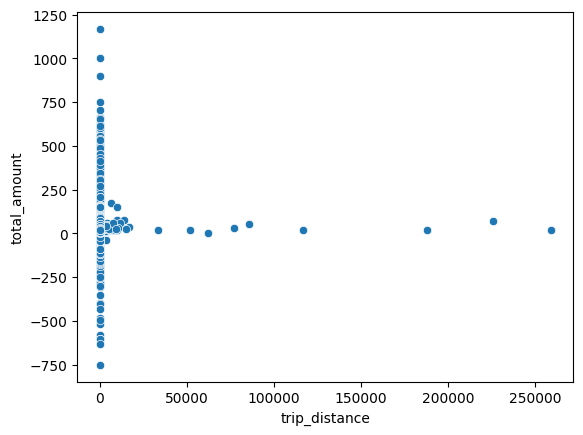

In [18]:
sns.scatterplot(x='trip_distance', y='total_amount',data=train)
plt.show()

In [19]:
print(train.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64


In [20]:
print('Old size: %d' % len(train))
train = train.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train))

Old size: 3066766
New size: 2995023


In [25]:
print('Old size: %d' % len(train))
train = train[(train.trip_distance < 500)]
print('New size: %d' % len(train))

Old size: 2995007
New size: 2995004


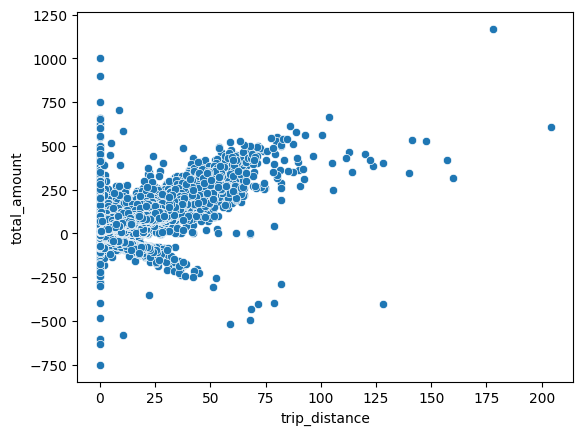

In [26]:
sns.scatterplot(x='trip_distance', y='total_amount',data=train)
plt.show()